In [1]:
using XLSX
using Plots
using JLD

include("../FCSeqTools.jl");

In [2]:
# LOAD FROM FILES
f_name = "aba3304_table_s1.xlsx"
xf = XLSX.readxlsx(f_name)
sh = xf["Sheet1"];

In [3]:
# READ MSA's
init, fin = 4, 1133
MSA_nat = Array{Char}(undef, 1130, 96)
for i ∈ init:fin
    for j ∈ 1:96
        MSA_nat[i - 3, j] = Char(sh[i, 3][j])
    end
end

MSA_paper  = do_number_matrix_prot(MSA_nat, 0.2); 
MSA_model = do_number_matrix_prot(do_letter_matrix("CM_130530_MC.fasta"), 0.2); # model

In [4]:
# UPLOAD AND COMPUTE FIELDS AND COUPLINGS
q = 21;
fields_paper = log.(freq_single_point(MSA_paper, q, 0.2))
fields_model = JLD.load("h.jld")["data"]
couplings_model = JLD.load("Jij.jld")["data"]

L_paper = length(MSA_paper[:,1]);
L_model = length(MSA_model[:,1]);

In [5]:
# PROFILE MODEL ENERGIES
function profile_energy(q, fields, MSA, L_MSA)
    energies = []
    for i in 1:L_MSA
        seq = MSA[i,:]'
        freq = freq_single_point(seq, q, 0.0); 
        push!(energies, - sum(freq .* fields))
    end
    return energies
end

# FULL MODEL ENERGIES
function full_model_energy(q, fields, couplings, MSA, L_MSA)
    full_energies = []
    for i in 1:L_MSA
        seq = MSA[i,:]' #paper
        freq = freq_single_point(seq, q, 0.0) 
        fij = fij_two_point(seq, q, 0.0)
        push!(full_energies, -sum(fij .* couplings) -sum(freq .* fields))
    end
    return full_energies
end

full_model_energy (generic function with 1 method)

In [6]:
prof_energy1 = profile_energy(q, fields_paper, MSA_paper, L_paper);
prof_energy2 = profile_energy(q, fields_model, MSA_model, L_model);
prof_energy3 = profile_energy(q, fields_model, MSA_paper, L_paper);
prof_energy4 = profile_energy(q, fields_paper, MSA_model, L_model);

full_energy1 = full_model_energy(q, fields_model, couplings_model, MSA_model, L_model)
full_energy2 = full_model_energy(q, fields_model, couplings_model, MSA_paper, L_paper);

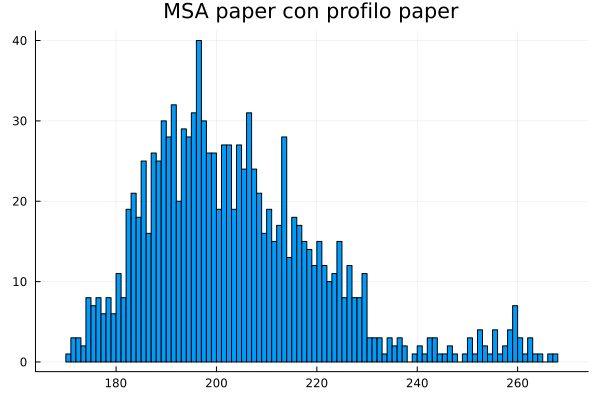

In [7]:
histogram(prof_energy1, bins=100, title= "MSA paper con profilo paper", label =:false)

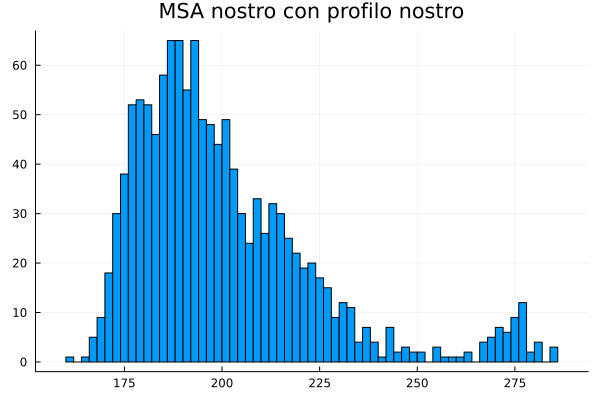

In [8]:
histogram(prof_energy2, bins=100, title= "MSA nostro con profilo nostro", label =:false)

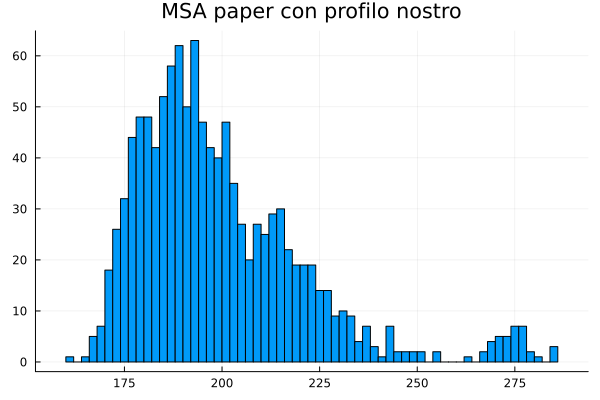

In [9]:
histogram(prof_energy3, bins=100, title= "MSA paper con profilo nostro", label =:false)

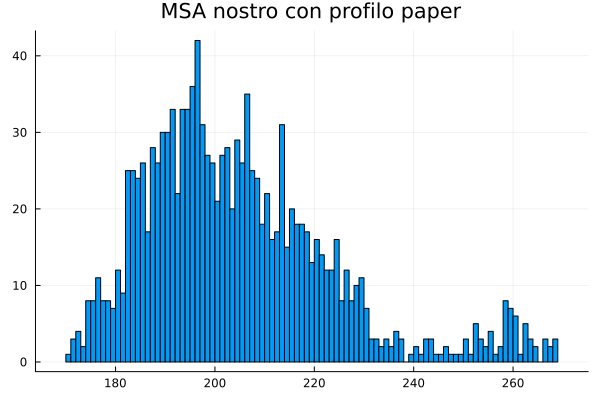

In [10]:
histogram(prof_energy4, bins=100, title= "MSA nostro con profilo paper", label =:false)

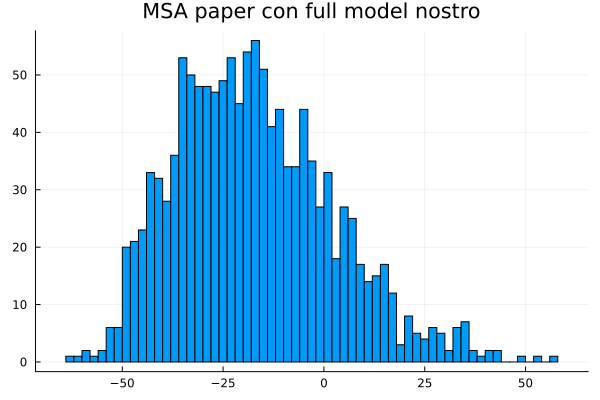

In [11]:
histogram(full_energy1, bins=100, title= "MSA paper con full model nostro", label =:false)

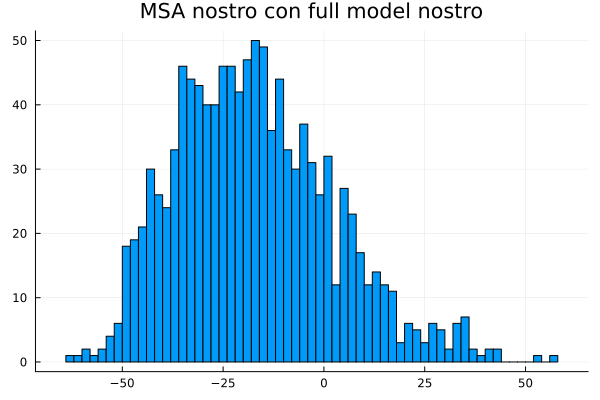

In [12]:
histogram(full_energy2, bins=100, title= "MSA nostro con full model nostro", label =:false)

In [14]:
couplings2 = JLD.load("Jij_0.3.jld")["data"]; # model

# Mutated MSA

In [15]:
function mutation_MSA(q, seq)
    MSA_mut1 = []
    push!(MSA_mut1, seq)
    c = 0
    for i in seq
        c += 1
        if i != q
            for a in 1:q - 1
                if a != i 
                    new_seq = copy(seq)
                    new_seq[c] = a
                    push!(MSA_mut1, new_seq)
                end
            end
        end
    end

    L_MSA = length(MSA_mut1)
    L_prot = length(MSA_mut1[1])

    MSA_mut = Array{Int64}(undef, L_MSA, L_prot)
    for i in 1:L_MSA
        for j in 1:L_prot
        MSA_mut[i, j] = MSA_mut1[i][j]
        end

    end

    return MSA_mut
end

mutation_MSA (generic function with 1 method)

In [18]:
q = 21
seq = MSA_paper[1,:]
MSA_mut = mutation_MSA(q, seq);
L_mut = length(MSA_mut[:,1]);

prof_energy_mut_paper = profile_energy(q, fields_model, MSA_mut, L_mut)
prof_energy_mut_model = profile_energy(q, fields_model, MSA_mut, L_mut)
prof_energy_mut_paper .-= prof_energy_mut_paper[1]
prof_energy_mut_model .-= prof_energy_mut_model[1];

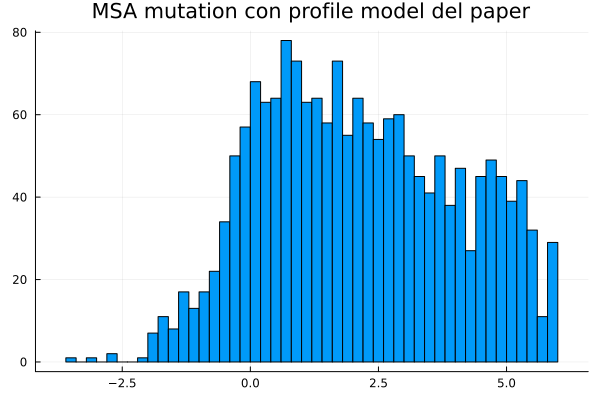

In [19]:
histogram(prof_energy_mut_paper, bins=50, title= "MSA mutation con profile model del paper", label =:false)

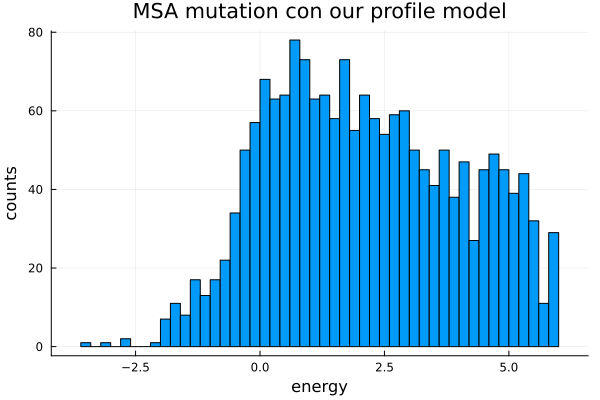

In [21]:
histogram(prof_energy_mut_model, bins=50, title= "MSA mutation con our profile model", xlabel="energy", ylabel="counts",label =:false)
#savefig("profile.png")

# Test with different scores

In [22]:
fields_model_03 = JLD.load("h_0.3.jld")["data"]
couplings_model_03 = JLD.load("Jij_0.3.jld")["data"];

fields_model_04 = JLD.load("h_0.4.jld")["data"]
couplings_model_04 = JLD.load("Jij_0.4.jld")["data"];

fields_model_05 = JLD.load("h_0.5.jld")["data"]
couplings_model_05 = JLD.load("Jij_0.5.jld")["data"];

fields_model_06 = JLD.load("h_0.6.jld")["data"]
couplings_model_06 = JLD.load("Jij_0.6.jld")["data"];

fields_model_07 = JLD.load("h_0.7.jld")["data"]
couplings_model_07 = JLD.load("Jij_0.7.jld")["data"];

fields_model_08 = JLD.load("h_0.8.jld")["data"]
couplings_model_08 = JLD.load("Jij_0.8.jld")["data"];

fields_model_09 = JLD.load("h_0.95.jld")["data"]
couplings_model_09 = JLD.load("Jij_0.95.jld")["data"];

In [23]:
full_energy_03 = full_model_energy(q, fields_model_03, couplings_model_03, MSA_mut, L_mut);
full_energy_04 = full_model_energy(q, fields_model_04, couplings_model_04, MSA_mut, L_mut);
full_energy_05 = full_model_energy(q, fields_model_05, couplings_model_05, MSA_mut, L_mut);
full_energy_06 = full_model_energy(q, fields_model_06, couplings_model_06, MSA_mut, L_mut);
full_energy_07 = full_model_energy(q, fields_model_07, couplings_model_07, MSA_mut, L_mut);
full_energy_08 = full_model_energy(q, fields_model_08, couplings_model_08, MSA_mut, L_mut);
full_energy_09 = full_model_energy(q, fields_model_09, couplings_model_09, MSA_mut, L_mut);


full_energy_03 .-= full_energy_03[1]
full_energy_04 .-= full_energy_04[1]
full_energy_05 .-= full_energy_05[1]
full_energy_06 .-= full_energy_06[1]
full_energy_07 .-= full_energy_07[1]
full_energy_08 .-= full_energy_08[1]
full_energy_09 .-= full_energy_09[1];

In [ ]:
histogram(full_energy_03, bins=70, title= "EAA model (Cij_score=0.3, complexity=0.04%)", xlabel="energy", ylabel="counts", label=:false)
#savefig("compl03.png")

"/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/check_bimodality/compl03.png"

In [ ]:
histogram(full_energy_04, bins=60, title= "EAA model (Cij_Score=0.4, complexity=0.07%)", xlabel="energy", ylabel="counts", label=:false)
#savefig("compl04.png")

"/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/check_bimodality/compl04.png"

In [ ]:
histogram(full_energy_05, bins=60, title= "EAA model (Cij_core=0.5, complexity=0.09%)", xlabel="energy", ylabel="counts", label=:false)
#savefig("compl05.png")

"/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/check_bimodality/compl05.png"

In [ ]:
histogram(full_energy_06, bins=60, title= "EAA model (Cij_Score=0.6, complexity=0.13%)", xlabel="energy", ylabel="counts", label=:false)
#savefig("compl06.png")

"/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/check_bimodality/compl06.png"

In [ ]:
histogram(full_energy_07, bins=60, title= "EAA model (Cij_Score=0.7, complexity=0.24%)", xlabel="energy", ylabel="counts", label=:false)
#savefig("compl07.png")

"/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/check_bimodality/compl07.png"

In [ ]:
histogram(full_energy_08, bins=60, title= "EAA model (Cij_Score=0.8, complexity=0.51%)", xlabel="energy", ylabel="counts", label=:false)
#savefig("compl08.png")

"/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/check_bimodality/compl08.png"

In [ ]:
histogram(full_energy_09, bins=60, title= "EAA model (Cij_Score=0.9, complexity=0.51%)", xlabel="energy", ylabel="counts", label=:false)
#savefig("compl09.png")

"/Users/robertonetti/Documents/GitHub/FCSeqTools.jl/Example_Proteins/check_bimodality/compl09.png"